In [463]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from numpy.random import randint

In [ ]:
# class MLP(nn.Module):
#     def __init__(self, in_features, out_features, n_hidden=10):
#         super().__init__()
#         n_hidden=10
#         self.lin1 = nn.Linear(in_features, n_hidden)
#         self.lin2 = nn.Linear(n_hidden, out_features)
        
#     def forward(self, x):
#         x = F.relu(self.lin1(x))
#         out = self.lin2(x)
#         return out

In [465]:
h=100
K=10
q = torch.rand(h)
kp = torch.rand(h)
kms = torch.rand(K, h)

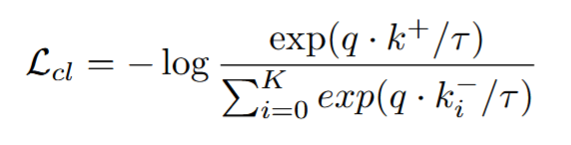

In [466]:
class ContrastiveLoss(nn.Module):
    def __init__(self, T=1):
        super().__init__()
        self.T = T

    def forward(self, q, kp, kms):
        return -torch.log(torch.exp(torch.matmul(q,kp.T)/self.T)/torch.sum(torch.exp(torch.matmul(q,kms.T)/self.T)))

L_cl = ContrastiveLoss(1)
L_cl(q, kp, kms)

tensor(1.1266)

In [467]:
H, W, C = 100, 100, 3
P = 32 #patch size
img = torch.rand(H, W, C)
x, y = (randint(0,H-P), randint(0,W-P))
img_patch = img[x:x+P, y:y+P, :] #To create patch of any image